In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df= pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [12]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [14]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [15]:
x = np.array(df['population']).reshape(-1,1)
y = np.array(df['households']).reshape(-1,1)
print(x,y)

[[1015.]
 [1129.]
 [ 333.]
 ...
 [1244.]
 [1298.]
 [ 806.]] [[472.]
 [463.]
 [117.]
 ...
 [456.]
 [478.]
 [270.]]


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print(regressor.score(X_test,y_test)*100)

85.87288035643559


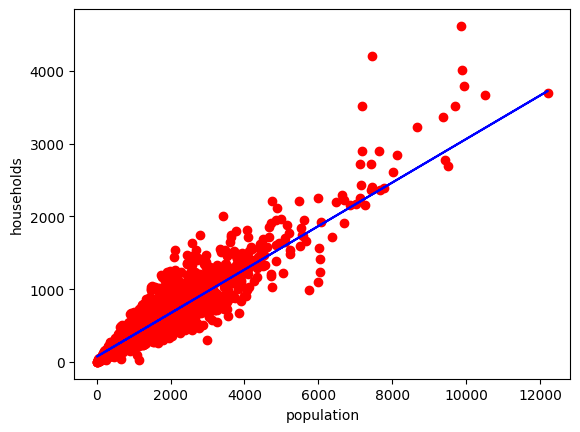

In [20]:
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_test, color ='r')
plt.xlabel('population')
plt.ylabel('households')
plt.plot(X_test, y_pred, color ='b')
plt.show()


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_polygon = poly.fit_transform(x)
md = LinearRegression()
md.fit(x_polygon,y)

LinearRegression()

In [22]:
md.score(x_polygon,y)*100

84.4337221905411

In [23]:
df.shape

(17000, 9)

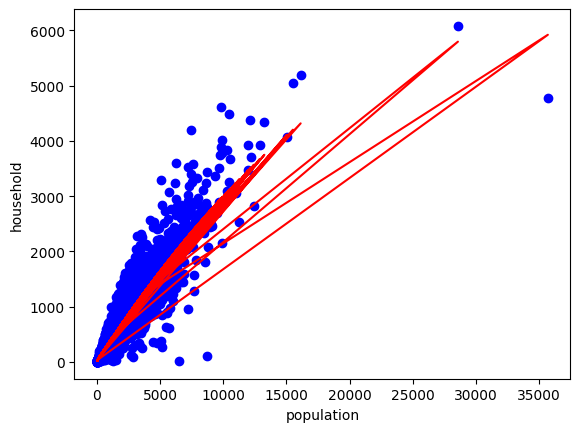

In [24]:
plt.scatter(x,y,color = 'b')
plt.plot(x,md.predict(x_polygon), color = 'r')
plt.xlabel('population')
plt.ylabel('household')
plt.show()

In [25]:
#l1
#lasso regression
from sklearn.linear_model import Lasso
l =  Lasso(alpha = 0.2)
l.fit(X_train,y_train)

Lasso(alpha=0.2)

In [26]:
l.score(X_train,y_train)*100

81.82577307519921

In [27]:
#l2
#ridge regressiion
from sklearn.linear_model import Ridge
r = Ridge(alpha = 0.1)
r.fit(X_train,y_train)

Ridge(alpha=0.1)

In [28]:
r.score(X_train,y_train)*100

81.82577307521936